# Loading model, imports

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!pip install transformers
!pip install ktrain

     |████████████████████████████████| 2.1MB 6.5MB/s 
     |████████████████████████████████| 3.3MB 44.6MB/s 
     |████████████████████████████████| 901kB 36.3MB/s 
     |████████████████████████████████| 25.3MB 1.3MB/s 
     |████████████████████████████████| 6.8MB 58.5MB/s 
     |████████████████████████████████| 983kB 60.9MB/s 
     |████████████████████████████████| 266kB 55.7MB/s 
     |████████████████████████████████| 1.9MB 43.4MB/s 
     |████████████████████████████████| 1.2MB 49.7MB/s 
     |████████████████████████████████| 471kB 48.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=efef4b3abc5e475541fd671a88efb21d48e7115f61ef055ad697c8b2bf307999
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=d97d950931ba2c14147d18801f90ad948cd2ee65a59828b0d6645867d4843760
  Stored in directo

In [5]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
import json

import ktrain
from ktrain import text
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
# for figure display
plt.rcParams['figure.figsize'] = [3,2]
plt.rcParams['figure.dpi'] = 120
pd.set_option('display.max_colwidth', None)

In [6]:
# customed package for exploring and cleaning the tweet data
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
import preprocess_kgptalkie as kgp

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-qxjedpdv
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-qxjedpdv
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11743 sha256=aa2766b0d8faca2b8a639c6edb8397b8c0589f679eb7c0e2ac85d7dcc5f4e8b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhrob9mi/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


# Loading COVID-19 data

In [7]:
events = []
# use "covid.data.jsonl" if using local setting
with open('gdrive/MyDrive/NLP-project1/covid.data.jsonl') as f:
  for line in f.readlines():
    events.append(json.loads(line))

In [8]:
print(events[0])

[{'created_at': 'Sun Jun 14 20:20:28 +0000 2020', 'id': 1272262651100434433, 'id_str': '1272262651100434433', 'truncated': False, 'display_text_range': [0, 243], 'entities': {'hashtags': [{'text': 'Tenet', 'indices': [82, 88]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1272262640753094656, 'id_str': '1272262640753094656', 'indices': [244, 267], 'media_url': 'http://pbs.twimg.com/media/Eaf8IYsWsAAHVHV.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Eaf8IYsWsAAHVHV.jpg', 'url': 'https://t.co/toqbGFdb7e', 'display_url': 'pic.twitter.com/toqbGFdb7e', 'expanded_url': 'https://twitter.com/FilmUpdates/status/1272262651100434433/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 676, 'resize': 'fit'}, 'large': {'w': 1296, 'h': 730, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1272262640753094656, 'id_str': '1272262640753094656', 'indices': 

In [9]:
for obj in events[0]:
  print(obj['text'])

According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e


In [10]:
all_text = []
for event in events:
  for obj in event:
    text = obj['text']
    all_text.append(text)

In [11]:
for i in range(10):
  print(i, all_text[i])

0 According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e
1 Hurricane Hanna has made landfall in Texas.

The storm is hitting a section of the Texas coast already reeling from thousands of coronavirus cases. https://t.co/KWL3awKW00
2 @TexasTribune Guess what the cause of death is from a hurricane ? Covid19. Good way to ramp up the numbers some more. 👀
3 Monkeys on the loose in India with stolen coronavirus blood samples https://t.co/UY3xCVxrpW https://t.co/AXDHmk1wH4
4 Eastleigh and Swahili Arabs in Mombasa where coronavirus are sky rocketing you know the problem, stop spitting everywhere like goats, the virus can be managed with proper hygiene discipline.
5 @BelAkinyii Let's not play blind that the work is fighting Islamic religion through Covid-19
6 @BelAkinyii When was the l

In [12]:
df=pd.DataFrame(all_text,columns=['text'])
df.head()

,text
0,"According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e"
1,Hurricane Hanna has made landfall in Texas.\n\nThe storm is hitting a section of the Texas coast already reeling from thousands of coronavirus cases. https://t.co/KWL3awKW00
2,@TexasTribune Guess what the cause of death is from a hurricane ? Covid19. Good way to ramp up the numbers some more. 👀
3,Monkeys on the loose in India with stolen coronavirus blood samples https://t.co/UY3xCVxrpW https://t.co/AXDHmk1wH4
4,"Eastleigh and Swahili Arabs in Mombasa where coronavirus are sky rocketing you know the problem, stop spitting everywhere like goats, the virus can be managed with proper hygiene discipline."


# Raw data exploration

In [13]:
tweet = kgp.get_basic_features(df)
tweet.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,"According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e",227,41,5.536585,12,1,0,7,1


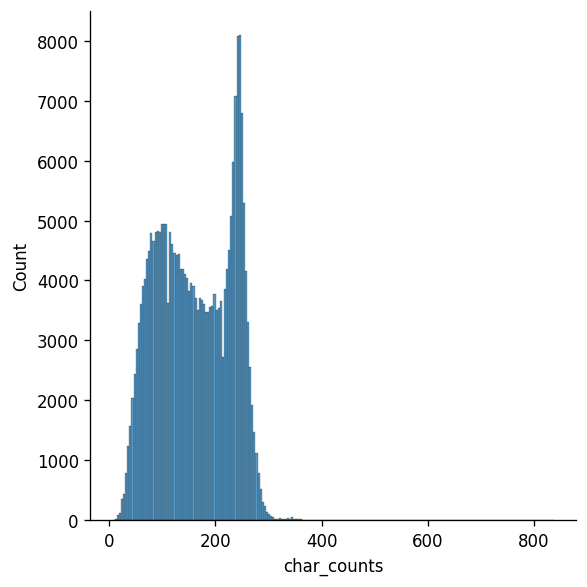

In [ ]:
sns.displot(tweet['char_counts'])

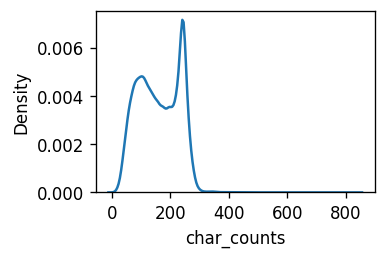

In [ ]:
# https://mathisonian.github.io/kde/ kdeplot explanation
sns.kdeplot(tweet['char_counts'])

In [ ]:
freqs = kgp.get_word_freqs(tweet, 'text')
top20 = freqs[:20]

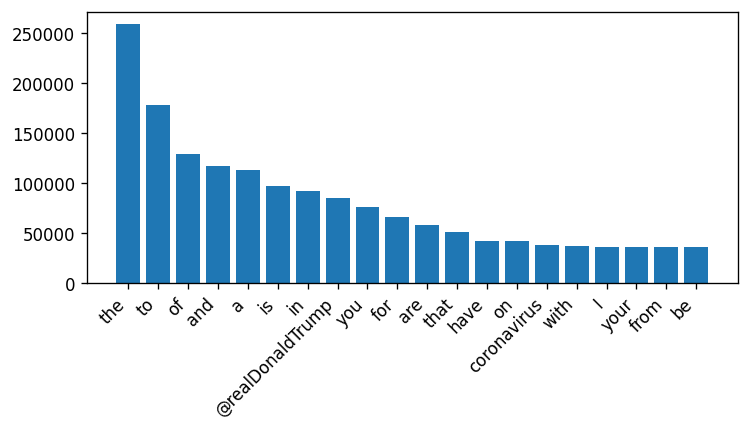

In [ ]:
# lots of stop words included in the count
plt.figure(figsize=(7,3))
plt.bar(top20.index, top20.values)
plt.xticks(rotation=45,ha='right') # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.show()

In [ ]:
# the counts includes punctuations
least20 = freqs[-20:]
least20

serene                           1
https://t.co/C3eemi7msN          1
#PencedemicCoverUp               1
Pray?                            1
#subway.                         1
count??                          1
-819,866+                        1
BLITHERING                       1
theyte                           1
https://t.co/PVPArmMVjD          1
https://t.co/EnJvDyVU4v          1
Chinna                           1
CHOOSES                          1
home,keeping                     1
#SeniorCitizens                  1
Lily                             1
lies..https://t.co/NvDBxVWHl4    1
Nutjobs                          1
https://t.co/U98oEB5dab          1
industry.Big                     1
dtype: int64

In [ ]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)
bigram[:20]

[('𝟹𝟷 𝙰𝙼', 1635471),
 ('𝟸𝟶𝟸𝟶 𝟷𝟸', 1635470),
 ('𝟷𝟸 𝟹𝟷', 1635469),
 ('𝟴𝟱𝟬𝟬𝟬 𝗺𝗼𝗿𝗲', 1635468),
 ('𝟳𝟰 𝗱𝗮𝘆𝘀', 1635467),
 ('𝟱𝟬𝟬 𝘁𝗶𝗺𝗲𝘀', 1635466),
 ('𝟰𝟱https co', 1635465),
 ('𝟰𝟯𝘅 more', 1635464),
 ('𝟯𝟭 president', 1635463),
 ('𝟮𝟰 million', 1635462),
 ('𝟮𝟰 he', 1635461),
 ('𝟭𝟵 in', 1635460),
 ('𝟭𝟴𝟲𝟱 𝗰𝗮𝘀𝗲𝘀', 1635459),
 ('𝟭𝟲 funding', 1635458),
 ('𝟭𝟯𝟰𝗸 𝗽𝗲𝗼𝗽𝗹𝗲', 1635457),
 ('𝟭𝟯𝟬 𝟬𝟬𝟬', 1635456),
 ('𝟭𝟬 of', 1635455),
 ('𝟬𝟬𝟬 𝗗𝗲𝗮𝘁𝗵𝘀', 1635454),
 ('𝟔𝟎𝟖 𝘿𝙀𝘼𝙏𝙃𝙎', 1635453),
 ('𝟒𝟓 european', 1635452)]

## Removing stop words and output to csv file
- already done -> covid_nostopword.csv

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
# from nltk.tokenize import TweetTokenizer

# tokenizer = TweetTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# def tokenlize(x):
#   return tokenizer.tokenize(str(x))
# def remove_stopwords(x):
#   filtered_token = [word for word in x if not word in stopwords.words()]
#   text = ' '.join(filtered_token)
#   return text

In [ ]:
# tweet['tokenized'] = tweet['text'].apply(tokenlize)

In [ ]:
# tweet['tokenized'].head()

0    [According, to, the, New, York, Times, ,, Warner, Bros, ., wanted, to, delay, Christopher, Nolan, ’, s, #Tenet, months, ago, due, to, the, COVID, -, 19, pandemic, but, Nolan, refused, to, listen, to, any, discussions, ., The, studio, kept, the, original, release, date, to, “, keep, [, Nolan, ], happy, ”, ., https://t.co/toqbGFdb7e]
1                                                                                                                                         [Hurricane, Hanna, has, made, landfall, in, Texas, ., The, storm, is, hitting, a, section, of, the, Texas, coast, already, reeling, from, thousands, of, coronavirus, cases, ., https://t.co/KWL3awKW00]
2                                                                                                                                                                                            [@TexasTribune, Guess, what, the, cause, of, death, is, from, a, hurricane, ?, Covid, 19, ., Good, way, to, ramp, up, the, numbers, s

In [ ]:
# tweet['text_no_stopword'] = tweet['tokenized'].apply(remove_stopwords)

In [ ]:
# tweet['text_no_stopword'].head()

0    According New York Times , Warner Bros . wanted delay Christopher Nolan ’ #Tenet months ago due COVID - 19 pandemic Nolan refused listen discussions . The studio kept original release date “ keep [ Nolan ] happy ” . https://t.co/toqbGFdb7e
1                                                                                                  Hurricane Hanna made landfall Texas . The storm hitting section Texas coast already reeling thousands coronavirus cases . https://t.co/KWL3awKW00
2                                                                                                                                                                   @TexasTribune Guess cause death hurricane ? Covid 19 . Good way ramp numbers . 👀
3                                                                                                                                               Monkeys loose India stolen coronavirus blood samples https://t.co/UY3xCVxrpW https://t.co/AXDHmk1wH4
4                   

In [ ]:
# output the no_stopword.csv
# tweet['text_no_stopword'].to_csv('/content/gdrive/MyDrive/NLP-project1/covid_nostopword.csv',index=None)

## Analyze the data without stopwords
- use "covid_nostopword.csv" if using local setting

In [14]:
# use "covid_nostopword.csv" if using local setting
df_nostop = pd.read_csv('/content/gdrive/MyDrive/NLP-project1/covid_nostopword.csv')
df_nostop = df_nostop.rename(columns={'text_no_stopword':'text'})
df_nostop.head(1)

,text
0,"According New York Times , Warner Bros . wanted delay Christopher Nolan ’ #Tenet months ago due COVID - 19 pandemic Nolan refused listen discussions . The studio kept original release date “ keep [ Nolan ] happy ” . https://t.co/toqbGFdb7e"


In [15]:
import string
# should replace the URL with a token to keep the contextual features
def remove_urls(text):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘]))''', "HTTPURL", text)
def remove_punctuation(x):
  return "".join([w for w in x if w not in '!"$%&\'()*+,-./:;<=>?[\]^_`{|}~'])

In [16]:
df_nostop['text'] = df_nostop['text'].apply(remove_urls)

In [17]:
df_nostop['text'] = df_nostop['text'].apply(remove_punctuation)

In [18]:
clean_tweet = kgp.get_basic_features(df_nostop)

In [19]:
clean_tweet.head()

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2
1,Hurricane Hanna made landfall Texas The storm hitting section Texas coast already reeling thousands coronavirus cases HTTPURL,109,17,6.411765,2,0,0,0,1
2,@TexasTribune Guess cause death hurricane Covid 19 Good way ramp numbers 👀,63,12,5.250000,0,0,1,1,0
3,Monkeys loose India stolen coronavirus blood samples HTTPURL HTTPURL,60,9,6.666667,0,0,0,0,2
4,Eastleigh Swahili Arabs Mombasa coronavirus sky rocketing know problem stop spitting everywhere like goats virus managed proper hygiene discipline,128,19,6.736842,1,0,0,0,0


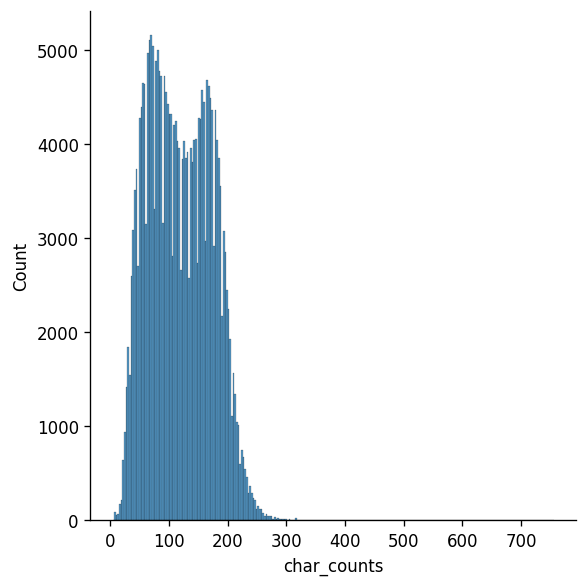

In [20]:
sns.displot(clean_tweet['char_counts'])

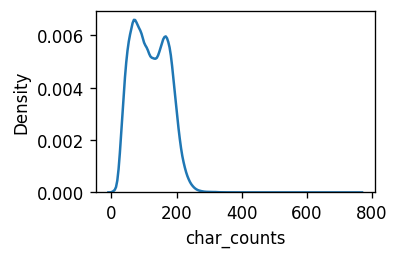

In [21]:
sns.kdeplot(clean_tweet['char_counts'])

In [22]:
freqs = kgp.get_word_freqs(clean_tweet, 'text')
top5 = freqs[:5]

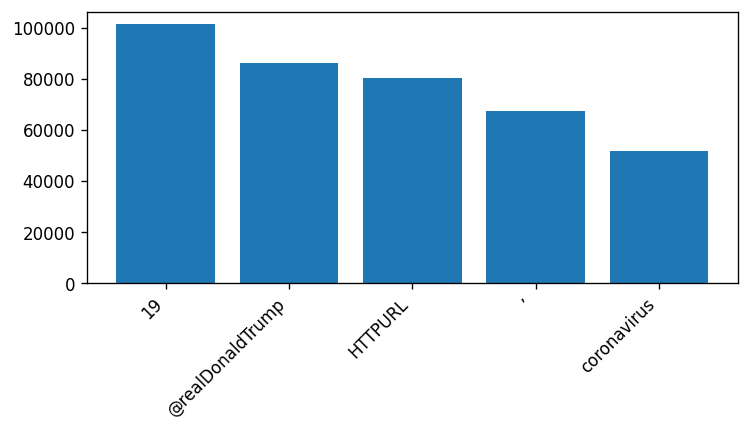

In [23]:
plt.figure(figsize=(7,3))
plt.bar(top5.index, top5.values)
plt.xticks(rotation=45,ha='right') # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.show()

In [24]:
least20 = freqs[-20:]
least20

#littleMarco       1
#KyleClark         1
XCOM               1
2us                1
antirheumatic      1
#FailurePOTUS45    1
Gilenya            1
@zaynmalik         1
Bismillah          1
@Patriqtscott      1
unleshed           1
@delina4az         1
TREACHERYTHE       1
Halfway            1
30992              1
@AnnRaces1988      1
OfDonald           1
Dejan              1
biodegradable      1
elf                1
dtype: int64

## Hashtag overview

In [25]:
clean_tweet.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2


In [26]:
all_hashtag = []
for each_text in all_text:
  for token in each_text.split():
    if token.startswith('#'):
      all_hashtag.append(token)

In [27]:
# test output for the hastag collection
for i in range(10):
  print(all_hashtag[i])

#Tenet
#coronavirus
#TrumpsCoronavirusRally
#Barr
#AbuseOfPower
#ObstructionOfJustice
#Patriot
#Berman
#SDNY
#RNC


In [28]:
from nltk import FreqDist

In [29]:
hashtag_freq = FreqDist(all_hashtag)

In [30]:
hashtag_freq.most_common(30)

[('#COVID19', 24890),
 ('#coronavirus', 13484),
 ('#Covid19', 2562),
 ('#covid19', 2462),
 ('#Coronavirus', 2241),
 ('#Trump', 1810),
 ('#CoronavirusPandemic', 1423),
 ('#COVID19.', 1374),
 ('#TrumpVirus', 1317),
 ('#WuhanVirus', 1233),
 ('#Covid_19', 1132),
 ('#COVIDー19', 1073),
 ('#CoronaVirus', 1049),
 ('#MAGA', 1007),
 ('#TrumpLiesAmericansDie', 758),
 ('#COVID', 730),
 ('#TrumpLiesPeopleDie', 689),
 ('#coronavirus.', 591),
 ('#COVIDIOTS', 582),
 ('#TrumpOwnsEveryDeath', 579),
 ('#TrumpGenocide', 570),
 ('#COVID19,', 528),
 ('#China', 524),
 ('#', 509),
 ('#USA', 483),
 ('#trump', 448),
 ('#1', 448),
 ('#Biden2020', 415),
 ('#StayHome', 414),
 ('#pandemic', 409)]

# Load pretrain-model and make prediction

In [ ]:
predictor = ktrain.load_predictor('/content/gdrive/MyDrive/DistilBERT_best')

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('-', ' ').replace(':', ' ').replace(',', ' ').replace(';',"").replace('&amp',"").replace('→', " ").replace('...',' ').replace("|", " ").replace("‘","").replace('.', ' ').replace('!', ' ').replace('?', ' ')
    x = kgp.cont_exp(x) #you're -> you are; i'm -> i am
    x = kgp.remove_emails(x)
    x = remove_symbol(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x) # 'lllooooovvveeee youuuu' -> I love you
    return x
def remove_symbol(x):
  x = str(x)
  filtered_list = []
  for token in x.split():
    filtered_list.append(token.replace("\n","").replace("#","").replace('"'," ").replace("*",'').replace("&amp","").replace("&gt","").replace("'","").replace("w/",""))
  x = filtered_list
  x = ' '.join(x)
  return x

In [ ]:
# not going to normlize the @USER here, since @realDonaldTrump dominantes the dataset
clean_tweet['normalized_text'] = df['text'].apply(remove_urls)
clean_tweet['normalized_text'] = clean_tweet['normalized_text'].apply(lambda x: get_clean(x))

In [ ]:
# predictions = predictor.predict(clean_tweet['normalized_text'].tolist())

In [ ]:
prediction_series = pd.Series(predictions)
df_prediction = pd.DataFrame(prediction_series,columns=['rumor_or_not'])

In [ ]:
clean_tweet['prediction'] = df_prediction['rumor_or_not']

In [ ]:
clean_tweet['prediction'].value_counts()

non-rumour    245940
rumour          8741
Name: prediction, dtype: int64

In [ ]:
clean_tweet.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2


In [ ]:
# clean_tweet.to_csv('/content/gdrive/MyDrive/NLP-project1/covid_clean_tweet.csv',index=None)

# Rumor analysis

In [ ]:
# 1. analyze the differenece using the kdeplot  -> in the model building dataset, rumor has higher avg_wordlength, stopwords_counts, charcounts
# 2. according to the rumor, non-rumor catetogory, analyze the popular topics again -> give the table or figure, with the possible explanation and observation
# 3. analyze the tweet text, try to distinguish the normal user and rumor maker
  # since tweet has limitation length in text, normal users would cram useful imformation instead of stopwords
  # maybe use sentiment model to compare? negative sentiment could be more like rumor?

In [ ]:
# using "covid_clean_tweet.csv" if using local settings
df = pd.read_csv('/content/gdrive/MyDrive/NLP-project1/covid_clean_tweet.csv')
df.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2,non-rumour


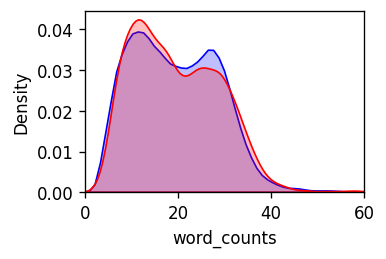

In [ ]:
plt.xlim(0,60)
sns.kdeplot(df[df['prediction']=='non-rumour']['word_counts'],shade=True,color='blue')
sns.kdeplot(df[df['prediction']=='rumour']['word_counts'],shade=True,color='red')

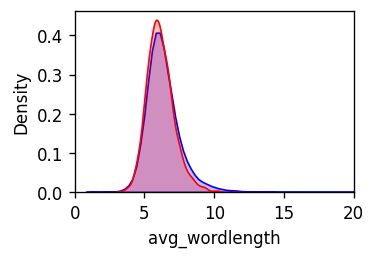

In [ ]:
plt.xlim(0,20)
sns.kdeplot(df[df['prediction']=='non-rumour']['avg_wordlength'],shade=True,color='blue')
sns.kdeplot(df[df['prediction']=='rumour']['avg_wordlength'],shade=True,color='red')

In [ ]:
rumors = pd.Series(df[df['prediction']=='rumour']['text'])

In [ ]:
df_rumor = pd.DataFrame(rumors,columns=['text'])

In [ ]:
df_rumor.head()

,text
33,@HeidiNBC hong kong 10 deaths even equally disfunctional govt WTF HTTPURL
44,@JasonOverstreet It enough Warrens brother died Covid 19 Really
80,@MattHancock High hopes Remdesivir Covid 19 treatment failed full trial HTTPURL HTTPURL
89,@BetteMidler That letter doctor said excellent health 6 3 weighs 230lbs He definitely coronavirus
226,A 155 people died coronavirus UK bringing total number deaths 44391 government figures show HTTPURL HTTPURL


In [ ]:
rumor_freqs = kgp.get_word_freqs(df_rumor, 'text')
rumor_top20 = freqs[:20]

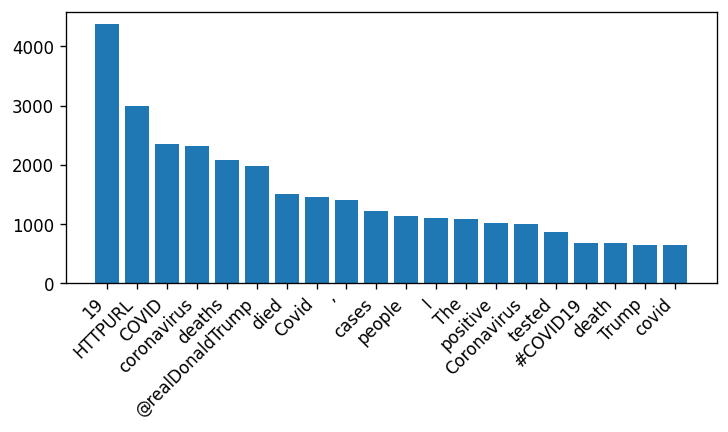

In [ ]:
plt.figure(figsize=(7,3))
plt.bar(rumor_top20.index, rumor_top20.values)
# https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(rotation=45,ha='right')
plt.show()

In [ ]:
non_rumors = pd.Series(df[df['prediction']=='non_rumour']['text'])
df_non_rumor = pd.DataFrame(non_rumors,columns=['text'])

In [ ]:
non_rumor_freqs = kgp.get_word_freqs(df_non_rumor, 'text')
non_rumor_top20 = freqs[:20]

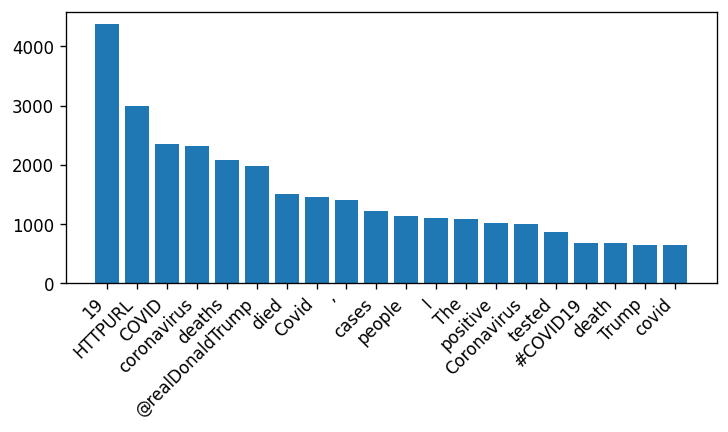

In [ ]:
plt.figure(figsize=(7,3))
plt.bar(non_rumor_top20.index, non_rumor_top20.values)
# https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(rotation=45,ha='right')
plt.show()

## Sentiment analysis

In [ ]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")

In [ ]:
df['sentiment'] = df['text'].apply(nlp)

In [31]:
# df.to_csv('/content/gdrive/MyDrive/NLP-project1/covid_clean_tweet_sentiment.csv',index=None)

In [ ]:
# use "covid_clean_tweet_sentiment.csv" if using local setting
df2 = pd.DataFrame(pd.read_csv("/content/gdrive/MyDrive/NLP-project1/covid_clean_tweet_sentiment.csv"))

In [ ]:
df2.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction,sentiment
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2,non-rumour,"[{'label': 'NEGATIVE', 'score': 0.9813826680183411}]"


In [ ]:
def get_label(data):
    import ast
    data = ast.literal_eval(data) # don't know why, the list turn out to be '[]' -> use ast.literal_eval
    label = data[0]['label']
    return label

In [ ]:
df2['sentiment_label'] = df2['sentiment'].apply(lambda x : get_label(x))

In [ ]:
df2.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction,sentiment,sentiment_label
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2,non-rumour,"[{'label': 'NEGATIVE', 'score': 0.9813826680183411}]",NEGATIVE


In [ ]:
df2['sentiment_label'].value_counts()

NEGATIVE    231247
POSITIVE     23434
Name: sentiment_label, dtype: int64

In [ ]:
df2['prediction'].value_counts()

non-rumour    245940
rumour          8741
Name: prediction, dtype: int64

In [ ]:
df2[(df2.prediction=='rumour') & (df2.sentiment_label=='NEGATIVE')].shape[0]

8453

In [ ]:
df2[(df2.prediction=='rumour') & (df2.sentiment_label=='POSITIVE')].shape[0]

288

In [ ]:
df2[(df2.prediction=='non-rumour') & (df2.sentiment_label=='NEGATIVE')].shape[0]

222794

In [ ]:
df2[(df2.prediction=='non-rumour') & (df2.sentiment_label=='POSITIVE')].shape[0]

23146

In [ ]:
df.head(1)

,text
0,"According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e"


In [ ]:
# for kgp to use the 'text' column for plotting
df2['text'] = df['text']

In [ ]:
df2.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction,sentiment,sentiment_label
0,"According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e",176,34,5.176471,2,1,0,1,2,non-rumour,"[{'label': 'NEGATIVE', 'score': 0.9813826680183411}]",NEGATIVE


In [ ]:
tweet = kgp.get_basic_features(df2)

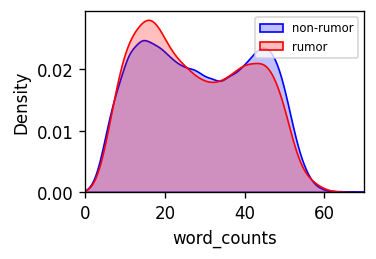

In [ ]:
plt.xlim(0,70)
sns.kdeplot(tweet[tweet['prediction']=='non-rumour']['word_counts'],shade=True,color='blue',label='non-rumor')
sns.kdeplot(tweet[tweet['prediction']=='rumour']['word_counts'],shade=True,color='red',label='rumor')
plt.legend(loc=0, fontsize='x-small')
plt.show()

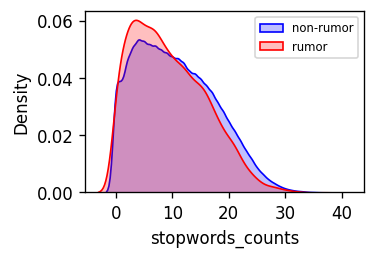

In [ ]:
sns.kdeplot(tweet[tweet['prediction']=='non-rumour']['stopwords_counts'],shade=True,color='blue',label='non-rumor')
sns.kdeplot(tweet[tweet['prediction']=='rumour']['stopwords_counts'],shade=True,color='red',label='rumor')
plt.legend(loc=0, fontsize='x-small')
plt.show()

## Hashtags

In [ ]:
df2.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction,sentiment,sentiment_label
0,"According to the New York Times, Warner Bros. wanted to delay Christopher Nolan’s #Tenet months ago due to the COVID-19 pandemic but Nolan refused to listen to any discussions. The studio kept the original release date to “keep [Nolan] happy”. https://t.co/toqbGFdb7e",227,41,5.536585,12,1,0,7,1,non-rumour,"[{'label': 'NEGATIVE', 'score': 0.9813826680183411}]",NEGATIVE


In [ ]:
# initialize the list to append the hashtags
all_rumor_hashtag = []
all_nonrumor_hashtag = []

In [ ]:
def get_rumor_hashtag(x):
  x = str(x)
  for token in x.split():
    if token.startswith('#'):
      all_rumor_hashtag.append(token.lower())
def get_nonrumor_hashtag(x):
  x = str(x)
  for token in x.split():
    if token.startswith('#'):
      all_nonrumor_hashtag.append(token.lower())
def remove_punct(word):
  x = [char for char in word if char not in string.punctuation]
  x = ''.join(x)
  return x

In [ ]:
df2[df2.prediction == 'rumour']['text'].apply(lambda x : get_rumor_hashtag(x))

33        None
44        None
80        None
89        None
226       None
          ... 
254605    None
254620    None
254624    None
254625    None
254680    None
Name: text, Length: 8741, dtype: object

In [ ]:
print(all_rumor_hashtag)

['#removetrumpnow', '#bunkerboy', '#impotus45', '#tulsarally', '#covid19.', '#coronavirus.', '#maga', '#covid19.', '#coronavirus', '#coronavirus', '#samorning', '#dstv403', '#fail', '#lockherup', '#covid2019uk', '#coronavirusuk', '#covid19', '#covid19.', '#trumpislosing', '#trump2020', '#biden2020landslide', '#chop', '#chaz', '#covid-19', '#mn', '#covid19.', '#covid19.', '#covid19', '#dicklessrapist', '#votehimout', '#georgefloyd', '#coronavirus,', '#derekchauvin.', '#blacklivesmatter', '#minneapolis', '#1--united', '#failureofleadership', '#russianbounty', '#blacklivesmatter', '#canadahomeworkhelp', '#covid19', '#russianbounty', '#coronavirus', '#fakenews', '#goyaboycott', '#trumplieseverytimehespeaks', '#americastrongerwithbiden', '#gopdeathpanels', '#trumpiskillingus', '#facesofcovid', '#coronavirus', '#usa', '#trumpvirus', '#1', '#covid19', '#covid19', '#breakingnews:', '#covid19', '#coronavirus', '#covid19', '#trumppandemicfailure', '#thiswillnotjustdisappear', '#thingsarenotgetti

In [ ]:
df2[df2.prediction == 'non-rumour']['text'].apply(lambda x : get_nonrumor_hashtag(x))

0         None
1         None
2         None
3         None
4         None
          ... 
254675    None
254676    None
254677    None
254678    None
254679    None
Name: text, Length: 245940, dtype: object

In [ ]:
print(all_nonrumor_hashtag)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
rumor_modified_hashtag = []
nonrumor_modified_hashtag = []

In [ ]:
for hashtag in all_rumor_hashtag:
  x = remove_punct(hashtag)
  x = x.encode("ascii",'ignore')
  x = x.decode()
  rumor_modified_hashtag.append(x)

for hashtag in all_nonrumor_hashtag:
  x = remove_punct(hashtag)
  x = x.encode("ascii",'ignore')
  x = x.decode()
  nonrumor_modified_hashtag.append(x)

In [ ]:
print(rumor_modified_hashtag)
print(nonrumor_modified_hashtag)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from nltk import FreqDist

In [ ]:
rumor_freq = FreqDist(rumor_modified_hashtag)
nonrumor_freq = FreqDist(nonrumor_modified_hashtag)

In [ ]:
rumor_freq.most_common(10)

[('covid19', 1008),
 ('coronavirus', 510),
 ('getusppe', 110),
 ('healthcareheroes', 97),
 ('covid19india', 51),
 ('trump', 41),
 ('breaking', 35),
 ('lockdown', 34),
 ('1', 24),
 ('trumpvirus', 22)]

In [ ]:
def popular_key_value(freqdist,TOPRank):
  keys = []
  values = []
  for i in range(TOPRank):
    key = freqdist.most_common(TOPRank)[:TOPRank][i][0]
    value = freqdist.most_common(TOPRank)[:TOPRank][i][1]
    keys.append(key)
    values.append(value)
  return keys, values

In [ ]:
popular_rumor_topic, popular_rumor_value = popular_key_value(rumor_freq,10)
popular_nonrumor_topic, popular_nonrumor_value = popular_key_value(nonrumor_freq,10)

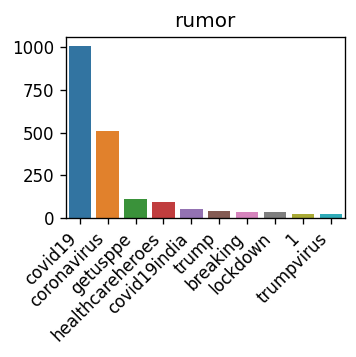

In [ ]:
sns.barplot(x=popular_rumor_topic, y=popular_rumor_value)
plt.xticks(rotation=45,ha='right')
plt.title('rumor')
plt.show()

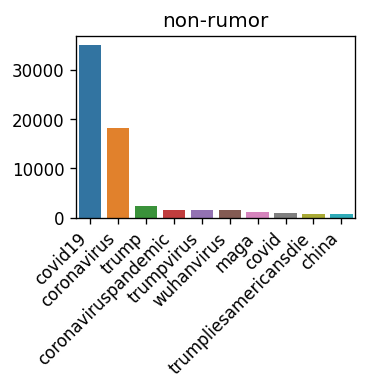

In [ ]:
sns.barplot(x=popular_nonrumor_topic, y=popular_nonrumor_value)
plt.xticks(rotation=45,ha='right')
plt.title('non-rumor')
plt.show()

## Unigram, bigram, trigram (if interested)


In [ ]:
# the clean tweet removes the stopwords and the possible punctuations
df3 = pd.DataFrame(pd.read_csv("/content/gdrive/MyDrive/NLP-project1/covid_clean_tweet_sentiment.csv"))

### Unigram

In [ ]:
df3.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction,sentiment
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2,non-rumour,"[{'label': 'NEGATIVE', 'score': 0.9813826680183411}]"


In [ ]:
rumor_series = pd.Series(df3[df3.prediction == 'rumour']['text'])
rumor_series.reset_index()
df_rumor = pd.DataFrame(rumor_series, columns=['text'])
df_rumor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 33 to 254680
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8741 non-null   object
dtypes: object(1)
memory usage: 136.6+ KB


In [ ]:
rumor_tweet = kgp.get_basic_features(df_rumor)

In [ ]:
freqs = kgp.get_word_freqs(rumor_tweet, 'text')
top10 = freqs[:10]

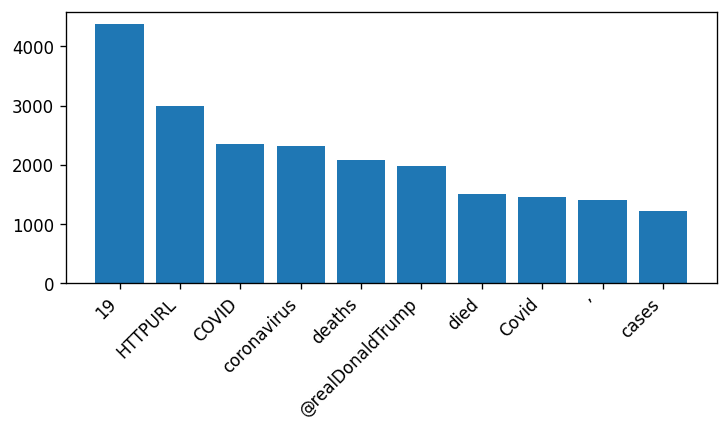

In [ ]:
plt.figure(figsize=(7,3))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45,ha='right') # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.show()

In [ ]:
nonrumor_series = pd.Series(df3[df3.prediction == 'non-rumour']['text'])
nonrumor_series.reset_index()
df_nonrumor = pd.DataFrame(nonrumor_series, columns=['text'])
df_nonrumor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245940 entries, 0 to 254679
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    245940 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [ ]:
nonrumor_tweet = kgp.get_basic_features(df_nonrumor)

In [ ]:
freqs = kgp.get_word_freqs(nonrumor_tweet, 'text')
top10 = freqs[:10]

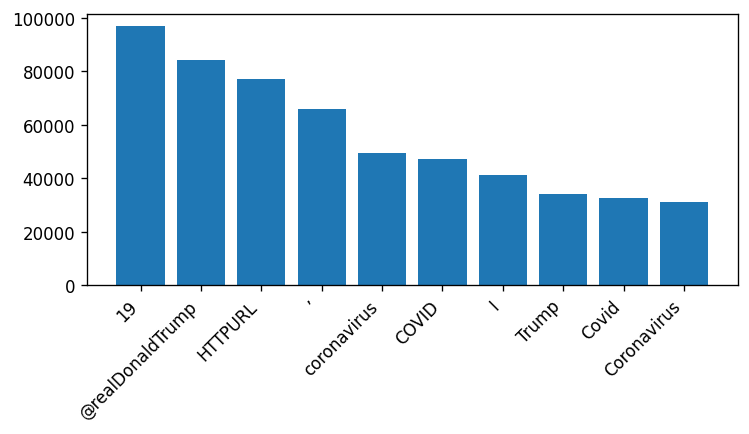

In [ ]:
plt.figure(figsize=(7,3))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45,ha='right') # https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.show()

### Bigram

In [ ]:
df_rumor.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
33,@HeidiNBC hong kong 10 deaths even equally disfunctional govt WTF HTTPURL,63,11,5.727273,1,0,1,1,2


In [ ]:
rumor_bigram = kgp.get_ngram(df_rumor, 'text', ngram_range=2)

In [ ]:
rumor_bigram[:20]

[('𝟸𝟶𝟸𝟶 𝟷𝟸𝟹𝟷', 101534),
 ('𝟷𝟸𝟹𝟷 𝙰𝙼', 101533),
 ('𝟐𝟔𝟎𝟖 𝘿𝙀𝘼𝙏𝙃𝙎', 101532),
 ('𝟐𝟑 wearamask', 101531),
 ('𝚘𝚏 𝚂𝚞𝚗', 101530),
 ('𝚂𝚞𝚗 𝙹𝚞𝚕', 101529),
 ('𝙹𝚞𝚕 𝟸𝟶𝟸𝟶', 101528),
 ('𝙴𝙳𝚃 𝘾𝙊𝙉𝙁𝙄𝙍𝙈𝙀𝘿', 101527),
 ('𝙰𝚜 𝚘𝚏', 101526),
 ('𝙰𝙼 𝙴𝙳𝚃', 101525),
 ('𝘿𝙀𝘼𝙏𝙃𝙎 𝟐𝟑', 101524),
 ('𝘾𝙊𝙉𝙁𝙄𝙍𝙈𝙀𝘿 𝘾𝘼𝙎𝙀𝙎', 101523),
 ('𝘾𝘼𝙎𝙀𝙎 𝟐𝟔𝟎𝟖', 101522),
 ('𝐫𝐞𝐬𝐢𝐝𝐞𝐧𝐭𝐬 dying', 101521),
 ('𝐩𝐞𝐫 𝐃𝐀𝐘', 101520),
 ('𝐃𝐀𝐘 we', 101519),
 ('武漢肺炎 wuhanvirus', 101518),
 ('来自 nypost', 101517),
 ('大家转推 chinese', 101516),
 ('हम रद', 101515)]

In [ ]:
nonrumor_bigram = kgp.get_ngram(df_nonrumor, 'text', ngram_range=2)

In [ ]:
nonrumor_bigram[:20]

[('𝟴𝟱𝟬𝟬𝟬 𝗺𝗼𝗿𝗲', 1819361),
 ('𝟳𝟰 𝗱𝗮𝘆𝘀', 1819360),
 ('𝟱𝟬𝟬 𝘁𝗶𝗺𝗲𝘀', 1819359),
 ('𝟰𝟱https httpurl', 1819358),
 ('𝟰𝟯𝘅 𝗱𝗲𝗮𝗱𝗹𝘆', 1819357),
 ('𝟯𝟭 president', 1819356),
 ('𝟮𝟰 million', 1819355),
 ('𝟮𝟰 he', 1819354),
 ('𝟭𝟵 covid', 1819353),
 ('𝟭𝟴𝟲𝟱 𝗰𝗮𝘀𝗲𝘀', 1819352),
 ('𝟭𝟲 funding', 1819351),
 ('𝟭𝟯𝟰𝗸 𝗽𝗲𝗼𝗽𝗹𝗲', 1819350),
 ('𝟭𝟯𝟬𝟬𝟬𝟬 𝗗𝗲𝗮𝘁𝗵𝘀', 1819349),
 ('𝟭𝟬 children', 1819348),
 ('𝟒𝟓 european', 1819347),
 ('𝟏𝐬𝐭 please', 1819346),
 ('𝙬𝙞𝙡𝙡 𝙚𝙣𝙙', 1819345),
 ('𝙨𝙢𝙚𝙡𝙡 covid', 1819344),
 ('𝙥𝙖𝙣𝙙𝙚𝙢𝙞𝙘 𝙬𝙞𝙡𝙡', 1819343),
 ('𝙚𝙣𝙙 one', 1819342)]

### Tirgram

In [ ]:
df_rumor.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
33,@HeidiNBC hong kong 10 deaths even equally disfunctional govt WTF HTTPURL,63,11,5.727273,1,0,1,1,2


In [ ]:
rumor_trigram = kgp.get_ngram(df_rumor, 'text', ngram_range=3)

In [ ]:
rumor_trigram[:20]

[('𝟸𝟶𝟸𝟶 𝟷𝟸𝟹𝟷 𝙰𝙼', 121514),
 ('𝟷𝟸𝟹𝟷 𝙰𝙼 𝙴𝙳𝚃', 121513),
 ('𝟐𝟔𝟎𝟖 𝘿𝙀𝘼𝙏𝙃𝙎 𝟐𝟑', 121512),
 ('𝟐𝟑 wearamask stayhome', 121511),
 ('𝚘𝚏 𝚂𝚞𝚗 𝙹𝚞𝚕', 121510),
 ('𝚂𝚞𝚗 𝙹𝚞𝚕 𝟸𝟶𝟸𝟶', 121509),
 ('𝙹𝚞𝚕 𝟸𝟶𝟸𝟶 𝟷𝟸𝟹𝟷', 121508),
 ('𝙴𝙳𝚃 𝘾𝙊𝙉𝙁𝙄𝙍𝙈𝙀𝘿 𝘾𝘼𝙎𝙀𝙎', 121507),
 ('𝙰𝚜 𝚘𝚏 𝚂𝚞𝚗', 121506),
 ('𝙰𝙼 𝙴𝙳𝚃 𝘾𝙊𝙉𝙁𝙄𝙍𝙈𝙀𝘿', 121505),
 ('𝘿𝙀𝘼𝙏𝙃𝙎 𝟐𝟑 wearamask', 121504),
 ('𝘾𝙊𝙉𝙁𝙄𝙍𝙈𝙀𝘿 𝘾𝘼𝙎𝙀𝙎 𝟐𝟔𝟎𝟖', 121503),
 ('𝘾𝘼𝙎𝙀𝙎 𝟐𝟔𝟎𝟖 𝘿𝙀𝘼𝙏𝙃𝙎', 121502),
 ('𝐫𝐞𝐬𝐢𝐝𝐞𝐧𝐭𝐬 dying 𝐩𝐞𝐫', 121501),
 ('𝐩𝐞𝐫 𝐃𝐀𝐘 we', 121500),
 ('𝐃𝐀𝐘 we must', 121499),
 ('武漢肺炎 wuhanvirus coronaviruschina', 121498),
 ('大家转推 chinese virologist', 121497),
 ('हम रद कर', 121496),
 ('सभ वन रक', 121495)]

In [ ]:
nonrumor_bigram = kgp.get_ngram(df_nonrumor, 'text', ngram_range=3)

In [ ]:
nonrumor_bigram[:20]

[('𝟴𝟱𝟬𝟬𝟬 𝗺𝗼𝗿𝗲 𝗰𝗮𝘀𝗲𝘀', 3167768),
 ('𝟳𝟰 𝗱𝗮𝘆𝘀 10000', 3167767),
 ('𝟱𝟬𝟬 𝘁𝗶𝗺𝗲𝘀 microplastic', 3167766),
 ('𝟰𝟯𝘅 𝗱𝗲𝗮𝗱𝗹𝘆 01', 3167765),
 ('𝟯𝟭 president trump', 3167764),
 ('𝟮𝟰 million yemenis', 3167763),
 ('𝟮𝟰 he requests', 3167762),
 ('𝟭𝟵 covid 19', 3167761),
 ('𝟭𝟴𝟲𝟱 𝗰𝗮𝘀𝗲𝘀 𝗨𝗦', 3167760),
 ('𝟭𝟲 funding paychecks', 3167759),
 ('𝟭𝟯𝟰𝗸 𝗽𝗲𝗼𝗽𝗹𝗲 𝗵𝗮𝘃𝗲', 3167758),
 ('𝟭𝟯𝟬𝟬𝟬𝟬 𝗗𝗲𝗮𝘁𝗵𝘀 httpurl', 3167757),
 ('𝟭𝟬 children globally', 3167756),
 ('𝟒𝟓 european union', 3167755),
 ('𝟏𝐬𝐭 please check', 3167754),
 ('𝙬𝙞𝙡𝙡 𝙚𝙣𝙙 one', 3167753),
 ('𝙨𝙢𝙚𝙡𝙡 covid 19', 3167752),
 ('𝙥𝙖𝙣𝙙𝙚𝙢𝙞𝙘 𝙬𝙞𝙡𝙡 𝙚𝙣𝙙', 3167751),
 ('𝙚𝙣𝙙 one possible', 3167750),
 ('𝙔𝙤𝙪 danger america', 3167749)]

# Text inspection

In [ ]:
df4 = pd.read_csv('/content/gdrive/MyDrive/NLP-project1/covid_clean_tweet.csv')

In [ ]:
df4.head(1)

,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,prediction
0,According New York Times Warner Bros wanted delay Christopher Nolan ’ #Tenet months ago due COVID 19 pandemic Nolan refused listen discussions The studio kept original release date “ keep Nolan happy ” HTTPURL,176,34,5.176471,2,1,0,1,2,non-rumour


In [ ]:
df4['original_text'] = df['text']

In [ ]:
df_rumor = df4[df4.prediction == 'rumour']['original_text']
df_nonrumor = df4[df4.prediction == 'non-rumour']['original_text']

In [ ]:
df_rumor.head(30)

33                                                                                                                                                                                                                            @HeidiNBC hong kong has had under 10 deaths even with an equally disfunctional gov't. WTF\nhttps://t.co/BdPli2zliV
44                                                                                                                                                                                                                                                              @JasonOverstreet It wasn't enough that Warren's brother died of Covid19? Really?
80                                                                                                                                                                                                        @MattHancock 'High hopes' drug Remdesivir for Covid-19 treatment failed in full trial https://t.co/pv6fN87J1c\nhttps://t.co/